### 1. 데이터 로드 

In [1]:
from  sklearn.datasets  import load_iris
data  = load_iris()  # Bunch(**kwargs)

data.keys()
#data.DESCR

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 2.EDA  [dataFrame변환  -> ]

     

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot  as plt

In [3]:
#2-1 dataframe변환 _ 피처  'data' : 독립변수 ndarray , 'feature_names':독립변수 리스트 , ->분석의 용이성  
features =  pd.DataFrame( data =data.data   ,columns=data.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#2-2  target  : 독립변수 ndarray , 
target  =   pd.DataFrame (data.target, columns =['species'] )
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
#2-2  features +  target    = iris     pd.concat ( features +  target , axis = 1 )
iris  = pd.concat([features , target] , axis = 1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#2-3 :  2-2의 결과로  속성을 통해 직접 접근이 공백으로 불가능하다.컬럼명을 공백 없이 지정변경하자.  
iris.rename({'sepal length (cm)':'sepal_length',
             'sepal width (cm)': 'sepal_width',
             'petal length (cm)':'petal_length',
             'petal width (cm)': 'petal_width'            
            } , axis=1, inplace= True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#2-4:  species의 내용을  분류 명으로 변경 하자.   Series.map()를 사용해보자. 
iris['species'] = iris.species.map(lambda x : data.target_names[x])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
#2-5. 결측값 확인  = isna는 리턴 불리언  sum으로 결측한 개수를 알 수있다. 
#True1, False 0 , axis = 0 (행방향)
#열별로 합산한 결과 
iris.isna().sum(axis = 0 )

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#2-6  기초 통계 분석 
# -> 데이터를 잘 이해하고 싶다. 데이터 크기, 데이터 모양(행렬 형상), 데이터 타입, 분포, 피처간의 관계
iris.info()  #  -> 정보 
iris.describe()   
#[확인] :petal_length는 표준편차가 크다 . 
#       petal_width는 표준편차 그러 그러한데 값의 범위가 좁다. 
#       피처간의 스케일의 차이가 있다고 판단해서 정규화를 생각한다. 
#      ->핵심 -> 모델링의 성능평가 후  다시한번 재튜닝을 해야 하는 곳!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#2-7 상관 분석 : 두 변수(피처) 간의 관계를 확인 한다.  corr 
#iris.corr() #petal_length	petal_width 가   0.962865 -> 관계도가 높다 

 #### 1) 상관관계가 높은 피처는 다중공선성 multicollinearity문제를 야기 시킬 수 있다. 둘중 하나의 변수만 분석에 사용한다.  
 #### 2) 독립변수가 서로 의존하는 관계  =다중공선성 
 #### 3) 독립변수가 서로 의존하게 되면 이렇게 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해칠 가능성이 높아진다. 
      3-1)변수 선택법으로 의존적인 변수 삭제
      3-2)PCA(principal component analysis) 방법으로 의존적인 성분 삭제
      3-3)정규화(regularized) 

In [12]:
#2-8 집계 분석  -> 그룹메소드를 이용해서 타켓별 통계 분석을 한다. / 종속변수 = 타켓 = 카테고리 분류의 개수 
iris.groupby("species").size() #결측값을 포함해서 데이터가 카운트, count()는 결측값을 제외하고 개수를 리턴

species
setosa        50
versicolor    50
virginica     50
dtype: int64

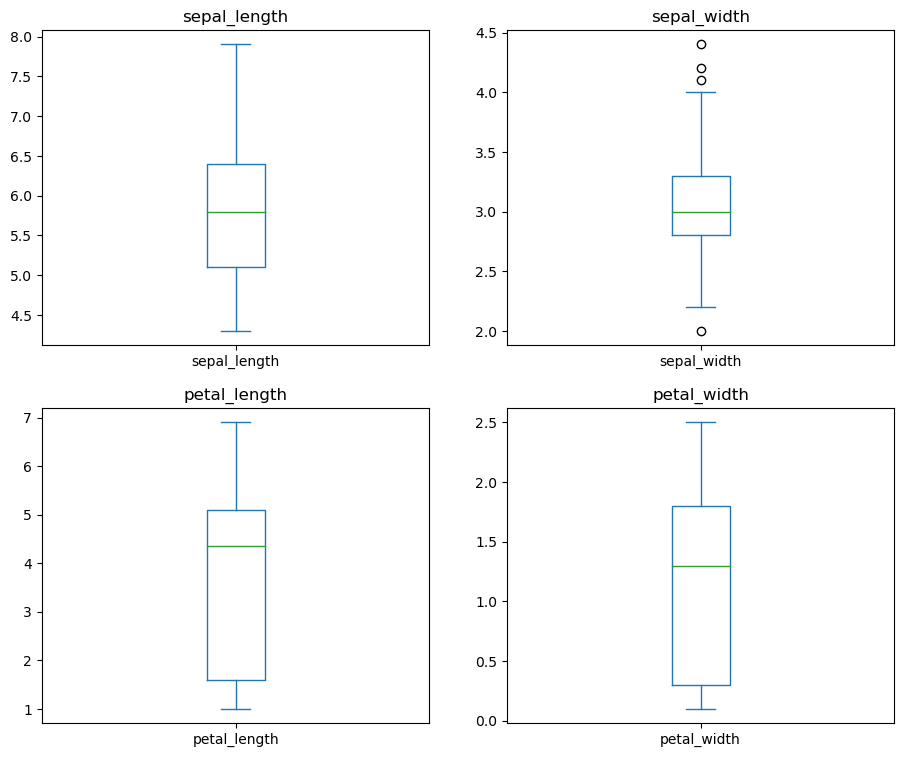

In [13]:
#2-9 이상치 탐지 그래프 확인 boxplot을 그려 기초 통계량을 시각화하고 이상치를 탐지한다
def boxplot_iris(feature_names, dataset): #X , df값 
    i=1
    plt.figure(figsize=(11,9)) #사이즈  
    for col in feature_names:  #X변수에 해당하는 그래프 개수를 그려내자.  
        plt.subplot(2,2,i)  #두줄에 두칸을 만들어서 인덱스로 순으로 그려내자.  
        plt.axis('on')
        plt.tick_params(axis='both',left =True)
        dataset[col].plot(kind='box', subplots=True) #그래프 선택  
        plt.title(col)
        i +=1
    plt.show()
boxplot_iris(iris.columns[:-1],iris) 
#[확인 ] : 데이터의 중심화 경향을 확인 할 수 있다. sepal_length, sepal_width의 박스가 작다!!
# sepal_width -> 이상치 확인 
#petal_length, petal_width  -> 박스길이가 길다  -> 데이터의 분포도가 넓다.  

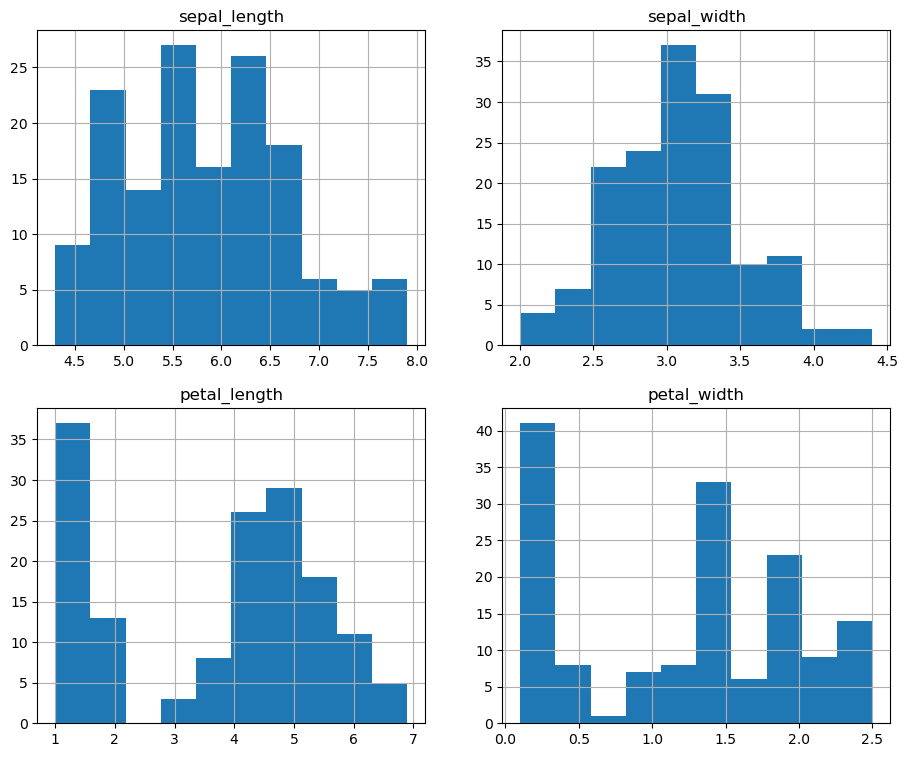

In [14]:
#2-9 데이터 분포 시각화 : histogram을 그려 피처별 데이터 분포를 시각화
def histogram_iris(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both',left =True)
        
        dataset[col].hist()
        plt.title(col)
        i +=1
    plt.show()
histogram_iris(iris.columns[:-1],iris)
#[확인]: 
#sepal_length: 그저그렇다  

#sepal_width : 박스플롯에서 길이가 짧았던 것은 중앙에 데이터가 몰려있다라는 것을 재 확인 

#petal_length : 빈도수는 높지만 한쪽으로 데이터가 몰려 있다고 판단, 박스플롯에서 아래쪽의 길이가 
#               길게 그려져 있는 것은 낮은 쪽에도 데이터가 많다라는 판단으로 재 확인             

#petal_width : 그러 그렇다.  단, 중앙쪽의 급간의 빈도수가 높다라고 판단, 
#                           중앙에서 멀어질수록 빈도수가 낮다. 

In [15]:
#2-9 상관관계 시각화 

corr = iris.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,9))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

ValueError: could not convert string to float: 'setosa'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


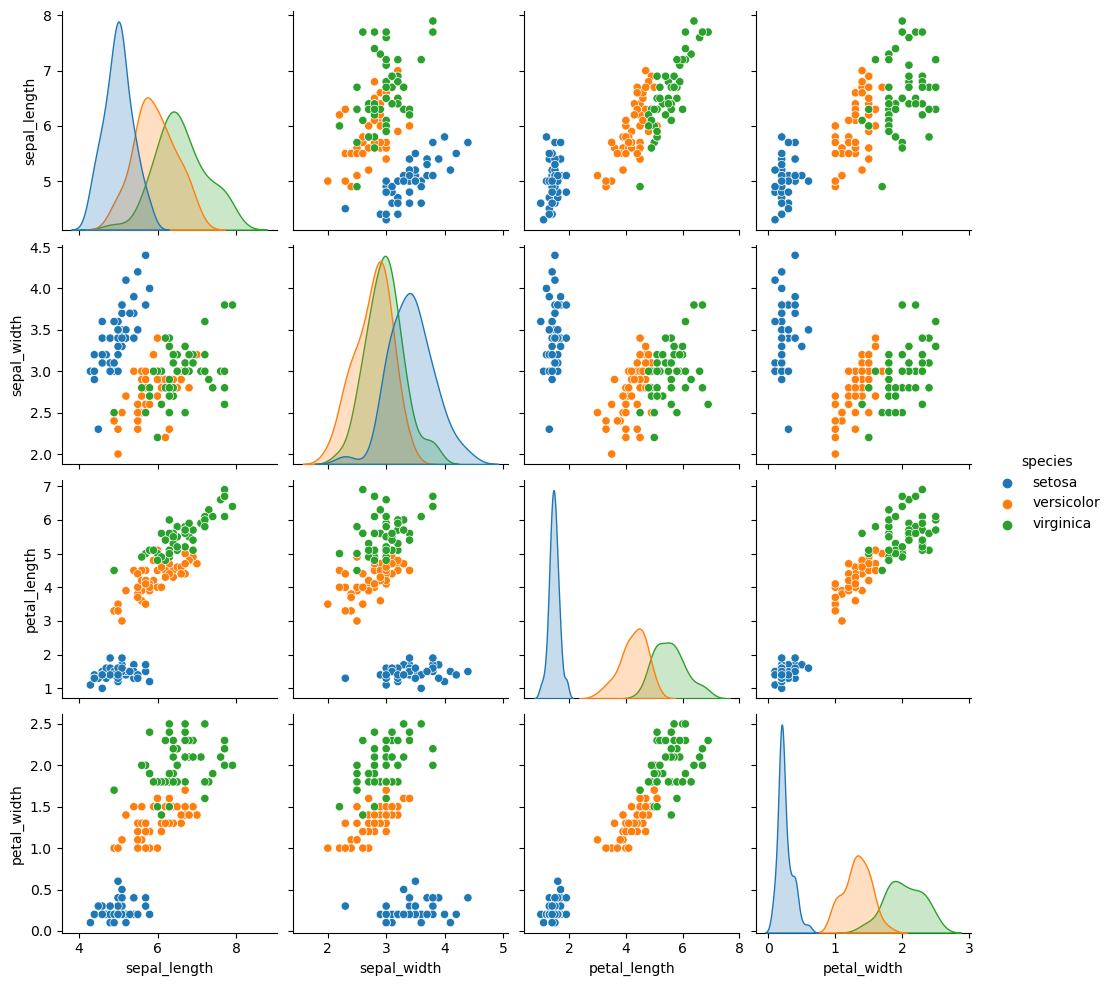

In [16]:
#2-9  pairplot 이용하여 피처 간의 상관관계 및 데이터 분포를 시각화한다.
sns.pairplot(iris, hue='species')
plt.show()

 hold out   (데이터 분리)
 - 기계학습 하기전에 데이터 셋을 훈련용 데이터, 성능평가용 데이터로 나눈다. 
-  최종목표:   일반 데이터  ->  모형  -> 새로운데이터로 예측 
-  신뢰성있는  평가를 위해 성능평가용 데이터 셋을 학습용 데이터와 분리한다.  

   X_train, X_test, y_train, y_test= train_test_split(, , test_size =0.3)  -> 훈련용 데이터train , 성능평가용test
    데이터 피처  = X, 타켓 = y ,  test_size =0.33  -> 33% 를 테스트셋으로 나눈 것  

In [17]:
##2-10 hold out 작업 한다.  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= \
train_test_split(iris.iloc[:,:-1], iris.iloc[:, -1], test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

### 3. 학습

In [18]:
from sklearn.tree  import DecisionTreeClassifier
#3-1. 모델 생성  _ 알고리즘 선택  
model  = DecisionTreeClassifier(random_state=42) #의사결정 나무 분류기  
model.fit(X_train, y_train) #알고리즘 실행  

DecisionTreeClassifier(random_state=42)

In [19]:
#3-2. 성능평가용 데이터셋을 이용해서  score를 확인  :score()정확도 
model.score(X_test,y_test)

0.98

###  일반화 전략 : 모델이 새로운 데이터에 대해서도 좋은 성능을 내도록 학습시키는 것을 말한다. 
- 기계학습은 데이터로부터 모델의 성능이 결정되는 특징(data-driven)이 있으므로,
데이터가 충분히 많아야 성능을 발휘할 수 있다.
- 데이터가 부족한 경우에는 과적합(overfitting) 문제가 발생할 수 있다. 모델이 학습 데이터
의 특징에만 적합하여 새로운 데이터(unseen data)에 대한 예측 능력이 떨어지게 된다. 
     
#### 방법 1)  validation set : 학습 중에 과적합이 발생했는지 확인 , 하이퍼 파라미터를 찾을 때 활용
 - train_test_split으로 분리한 성능검증용 데이터셋은 모델의 최종 성능평가를 위해서 분리한 것. 
 - 모델을 학습하는 과정에서도 모델 성능을 확인할 필요가 있으므로 학습데이터셋에서 일부를 hold out하여 validation set으로 활용한다.

#### 방법 2) cross validation(교차검증) : validation set을 여러개 만들어서 모든 데이터가 한 번씩 학습에 포함되도록 하는 전략
  
  
[순서]   

데이터셋을 임의의 숫자 k개만큼 나눈다.(k-fold)  ->   
 첫 번째 조각을 밸리데이션셋으로 사용하고 나머지 k-1개 조각들을 학습데이터셋(train set)으로 학습  
  -> 성능 측정->   
 두 번째 조각을 테스트 셋으로 사용하고 나머지 조각들을 트레인 셋으로 사용해서 학습
-> 성능 측정->  
 나머지 조각에 대해서도 같은 과정을 반복  
 ->  최종적으로 k개의 성능측정 결과를  평균 내서 모델의 성능 추정  

In [20]:
#3-3. 일반화 작업  cross validation(교차검증) -> 과적합과 하이퍼파라미터를 찾자  
from sklearn.model_selection import cross_val_score,KFold

cv  = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    

print(' 최종  교차 검증 정확도 : {} '.format(fin_results))


0번째 교차 검증 정확도 : 0.9 
1번째 교차 검증 정확도 : 1.0 
2번째 교차 검증 정확도 : 0.8 
3번째 교차 검증 정확도 : 1.0 
4번째 교차 검증 정확도 : 0.8 
5번째 교차 검증 정확도 : 0.9 
6번째 교차 검증 정확도 : 1.0 
7번째 교차 검증 정확도 : 0.9 
8번째 교차 검증 정확도 : 1.0 
9번째 교차 검증 정확도 : 1.0 
 최종  교차 검증 정확도 : 0.93 


In [27]:
#pip install scikit_plot

In [28]:
#3-4 . 일반화 작업  StratifiedKFold( 클래스 균등 분할 교차  검증) 
#타켓클래스가 일정하지 않다라고 판단될 경우 사용한다. 
#타켓클래스의 비율을 일정하게 분할 하게 된다.  

from sklearn.model_selection import cross_val_score,StratifiedKFold

cv  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    

print(' 최종  교차 검증 정확도 : {} '.format(fin_results))

0번째 교차 검증 정확도 : 0.9 
1번째 교차 검증 정확도 : 0.9 
2번째 교차 검증 정확도 : 0.8 
3번째 교차 검증 정확도 : 0.9 
4번째 교차 검증 정확도 : 1.0 
5번째 교차 검증 정확도 : 1.0 
6번째 교차 검증 정확도 : 0.9 
7번째 교차 검증 정확도 : 0.8 
8번째 교차 검증 정확도 : 1.0 
9번째 교차 검증 정확도 : 1.0 
 최종  교차 검증 정확도 : 0.9199999999999999 


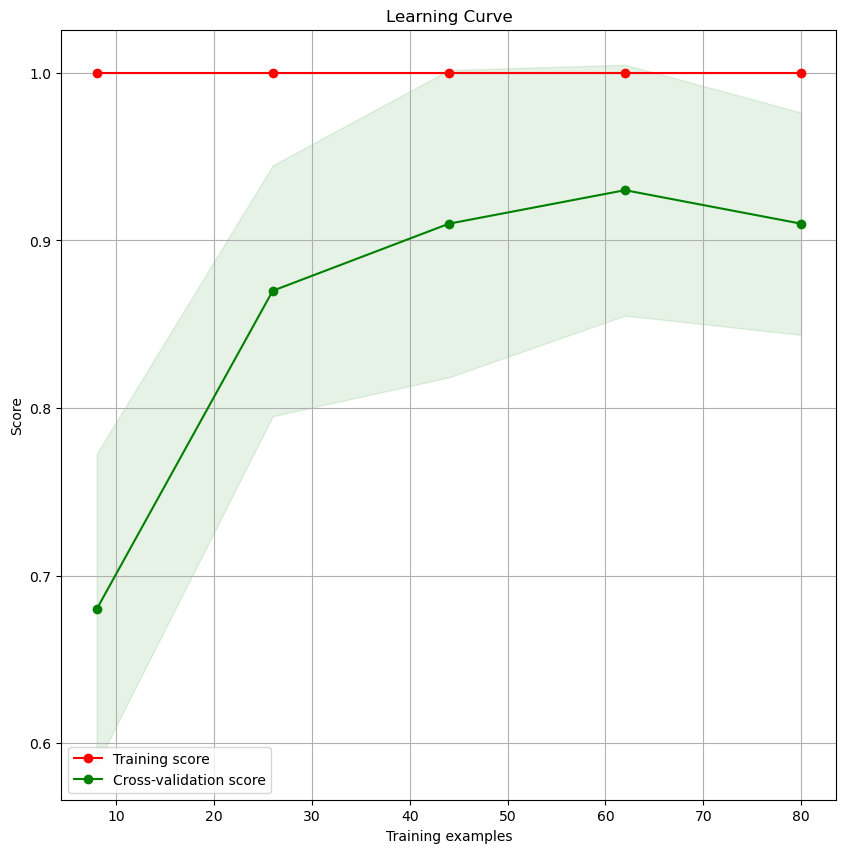

In [29]:
#!pip install scikit_plot  -> 데이터량 판단  
#3 - 5. scikit_plot을 이용해 보자. 
#학습용 데이터와 검증용 데이터, 
#테스트용 데이터에 [중복 데이터가 무작위로 있을 수 있다라고 판단] 되는 소규모이하의 데이터를
#시각적으로 판단할 때 제공되는 그래프  
import  scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train,figsize=(10,10))
plt.show()
#[확인]  학습곡선을 표시 -> X축: 학습데이터 개수 -> y축 : 성능점수
#학습데이터 데이터량을 늘릴 때마다 성능평가를  곡선으로 표시한다.  
#곡선은 내부연산 알고리즘으로 교차 검증을 사용한다.  

#print(help(skplt.estimators.plot_learning_curve)) 

plot_learning_curve(clf, X, y, title='Learning Curve', cv=None, shuffle=False, random_state=None, train_sizes=None, n_jobs=1, scoring=None, ax=None, figsize=None, title_fontsize='large', text_fontsize='medium')
    

###  3-6  모델 최적화 전략  (ML)

 - 1) 하이퍼 파라미터  : 대량의 데이터를 모형을 통해 값을 전달 해서  최적화된 학습모델을 생성 _ 학습모형에 사람이 직접 주는 값을 말한다. 
                        모델 생성시 생성자를 통해서 값을 전달하게 되는데 이 때 값을 하이퍼파라미터 라고 한다.  
                        
 - 2) GridSearchCV : 하이퍼 파라미터를 찾는 클래스   ,param_grid의 속성을 통해 원하는 튜닝값을 전달 한다.  
  첫번째 매개인자 안에 들어가는 파람값을 정의해서 두번째 매개인자인 parma_grid로 전달한다. 

-GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 


class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

parameter  = { 
 'max_depth' :[4,6,8,10,12]  ,
 'criterion' : ['gini','entropy'] ,
'splitter' :  ['best','random'] ,
'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3] , 
'random_state' : [7,23,42,78,178]  , 
'min_impurity_decrease'  :[0.0,0.5,1.0,0.2] 
}


# 3-6. 최적화를 사용해 보자.

In [30]:
#3-6. 최적화를 사용해 보자
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()

parameter = {
 'max_depth': [2, 4, 6, 8, 10, 12],
 'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
 'random_state': [7, 23, 42, 78, 178],
 'min_impurity_decrease': [0.0, 0.5, 1.0, 0.2]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=cv, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train, y_train)


Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.5, 1.0, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 178],
                         'splitter': ['best', 'random']},
             verbose=1)

In [31]:
#최적값 확인 
print( "최적의 모델  :  "  , model.best_estimator_)
print( "최적의 파람  :  "  , model.best_params_)
print( "최적의 점수  :  "  , model.best_score_)

최적의 모델  :   DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=23,
                       splitter='random')
최적의 파람  :   {'criterion': 'entropy', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'random'}
최적의 점수  :   0.96


### 4. 최종평가
     -> 최종평가 데이터는 hold out 해놓은 데이터를 가지고 테스트 한다. 
     -> 모델의 최종 평가  = X_test, y_test
     -> 더 정확한 평가를 확인 하기 위해 평가 지표를 리턴 받는다. 

In [32]:
# 4-1 : 예측과 정답  
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy :',acc)

Accuracy : 0.98


###  4-2  Confusion Matrix : 예측 결과 맞은 것과 틀린 것을 모두 분석하기 위해 오분류표(confusion matrix)
- 실제 타겟에 대해서 얼마나 잘 맞았는지 다각도로 성능을 검증하는 방법

이진분류  
- 네 가지 개념(TP, FP, TN, FN)를 기반으로 precision, recall, f1-score 등의 평가 점수를 만들 수 있다.
    
|         |양성 예측 |  음성 예측|
| :--- | :---: | ---: |
|실제양성| TP (True Positive) |  FN (False Negative)|
|실제음성| FP (False Positive)|  TN (True Negative) |



In [33]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)

#실제, 예측
cm =confusion_matrix(y_test, pred) 
print('confusion_matrix :\n\n' , cm )

confusion_matrix :

 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


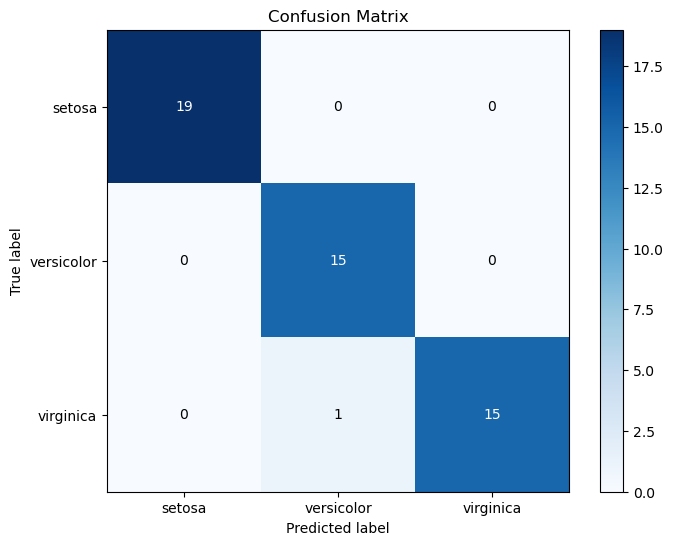

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, pred, figsize = (8,6)) 
plt.show()

In [35]:
#4-1 정밀도 구하기 
# 다중분류일 경우에는 average= None 
# 기본값은  average= binary 
from sklearn.metrics import precision_score 

pre  = precision_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(data.target_names, pre):
    print(f"{target}의 정밀도 : {score}")


setosa의 정밀도 : 1.0
versicolor의 정밀도 : 0.9375
virginica의 정밀도 : 1.0


In [36]:
#4-2 재현율을 구하자.  recall_score: 실제 타켓 클래스 중에 예측이 맞는 비율이다. = 민감도  
 #tp / (tp + fn)
from sklearn.metrics import recall_score

recall  = recall_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(data.target_names, recall):
    print(f"{target}의 재현률 : {score}")


setosa의 재현률 : 1.0
versicolor의 재현률 : 1.0
virginica의 재현률 : 0.9375


In [37]:
#4-3  f1
from sklearn.metrics import f1_score

f1  = f1_score( y_test, model.predict(X_test) , average= None)

for target,score  in zip(data.target_names, f1):
    print(f"{target}의 F : {score}")

setosa의 F : 1.0
versicolor의 F : 0.967741935483871
virginica의 F : 0.967741935483871


In [38]:
#4-4  정답  
from sklearn.metrics import accuracy_score

accuracy  = accuracy_score( y_test, model.predict(X_test) )
print(f"{target}의 정답 : {accuracy}")


virginica의 정답 : 0.98


In [39]:
##4-5  리포트  
from sklearn.metrics import classification_report
import pandas as pd
import pprint

res = classification_report(y_test, model.predict(X_test), output_dict=True)
#pprint.pprint(res)

df  = pd.DataFrame(res)
df
# support  : 실제 타켓 클래스의 개수  _ 클래스 평가 점수의 평균을 모델의 종합 성능 점수로 활용된다. 
# macro avg : 단순평균
#weighted avg : 가중 평균  -> 각 클래스에 속하는 표본의 개수로 가중평균을 나타낸 것  

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.937500,1.000000,0.98,0.979167,0.98125
recall,1.0,1.000000,0.937500,0.98,0.979167,0.98000
f1-score,1.0,0.967742,0.967742,0.98,0.978495,0.98000
support,19.0,15.000000,16.000000,0.98,50.000000,50.00000


#4-6  RUC  , AUC 

- ROC는 fpr(False Positive rate)= X축= fall out   and tpr(True Positive Rate) =y축 = recall 
 
- ROC( Receiver Operating Characteristic ) :  재현률을 좀더 명확하게 판단하기 위한 것 
   -판별기준이 낮을 수록 Positive로 예측하는 수가 증가한다.  
   
  ex) setosa확률 0.6일때 , 기준값 0.55-> Positive양성  / 기준값을 0.65로 높이면 negative(음성) 
   tpr의 분모(TP+FN)는 실제로 양성이 표본 개수가 되고 항상 고정이다.  
   fpr의 분모(FP+TN)는 실제로 음성이 표본 개수가 되고 항상 고정이다.   
$$
TPR = \dfrac {TP}{TP+FN}
$$
 
$$
FPR = \dfrac {FP}{FP+TN}
$$ 

- Positive 예측  = TP+FP 분모가 고정인 상태에서  Positive값이 증가면 일반적으로 TP, FP도 동시에 증가한다. 
- TPR , FPR은 상관관계가 있다. 

 

- ROC는 0~ 1까지의 그래프로 그려진다.   / 예측 확률과 실제 정답률로 곡선을 계산한다. 
- AUC는 1인 경우에 가장 분류 모델의 성능이 좋다고 판단한다. 

- AUC  0.5 보다 크면 무작위로 만든 분류모델보다는 성능이 좋다고 판단한다.  
  반대로 낮다면 분류모델에 문제가 있다라고 판단한다. 


In [43]:
 # 각 클래스에 대한 확률/ 클래스에  대한 출력은 0과 1사이의 값 , 클래스의 합은  1이다.
proba =model.predict_proba(X_test) 
print("확률 값의 형태: {}".format(proba.shape)) 

#print(proba) #->예측확률

print("합: {}".format(model.predict_proba(X_test)[:5].sum(axis=1))) #행방향으로 합을 구하면 1이 된다.

#skplt.metrics.plot_roc(y_test,proba, figsize=(8,6))
#plt.show()

확률 값의 형태: (50, 3)
합: [1. 1. 1. 1. 1.]


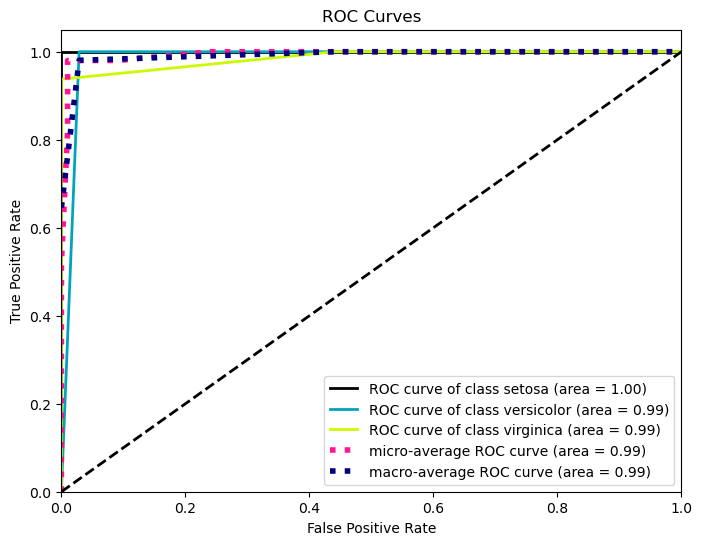

In [44]:
#4-6 ,ROC 커브를 그려보자.  
skplt.metrics.plot_roc(y_test,proba, figsize=(8,6))
plt.show()

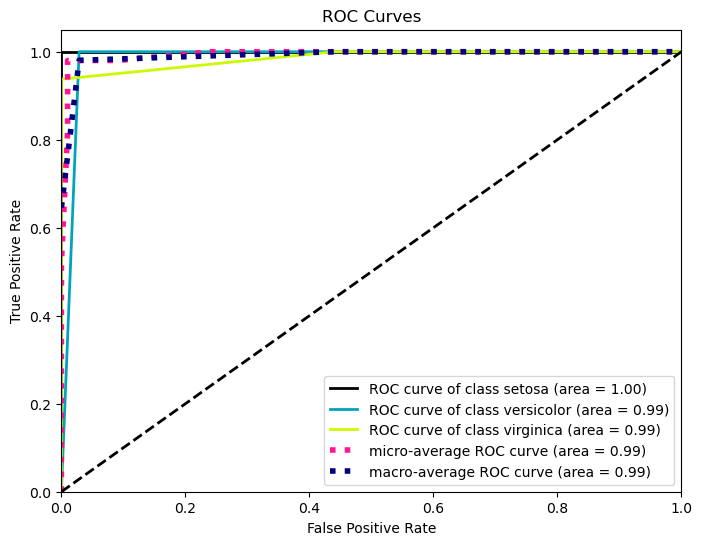

In [45]:
#4-7) virginica 유무에 대한 예측에 대한  ROC 곡선을 그려보자. 

res = classification_report(y_test, model.predict(X_test), output_dict=True)
res

proba =model.predict_proba(X_test)
proba

skplt.metrics.plot_roc(y_test, proba, figsize=(8,6))
plt.show()


###  성능 저하된 확인 
- 1) 모델을 바꾼다. 
- 2) 하이퍼 파라미터를 재조정, 알고리즘
- 3) 전처리기 단계로 돌아가서 피처스케일링, 의미없는 피처를 줄인다. 
- 4) 데이터가 없다, 데이터 품질이 문제다 --------->수집단계 